# Scipy ODE solver demo

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
%matplotlib widget

## Modelled system

Modelled system is an imaginary 1 D heat equation

\begin{align}
\frac{\partial T}{\partial t} &= -C^{-1}\left(\frac{\partial q}{\partial x} - s\right) \\
s &= T \cdot a,
\end{align}

where T is the temperature (K), C is the volumetric heat capacity (J m<sup>-3</sup>K<sup>-1</sup>), q is the conductive heat flux (W m<sup>-2</sup>) and s is an imaginary source term (W m<sup>-3</sup>). For demonstration purposes we will assume completely random numerical values for the terms. We will solve this equation in domain $x \in [0, 1]$; $t \in [0, 50]$. We will assume that the conductive heat flux from left and right of the system is zero.


## Define params dictionary for constant terms

- c: volumetric heat capacity
- q: conductive heat flux
- x: space discretization
- a: constant a for calcuting the imaginary source term s
- Nx: number of x elements

In [77]:
Nx = 10
params = {'c': 5, 'q': np.random.random((Nx,))*0.1, 'x': np.linspace(0,1,Nx+1), 'a': 0.01, 'Nx': Nx}

## Define the right hand side of eq. (1)

t is time and y will containt the solutions of T from previous ode solver time step.

In [64]:
def odefun(t,y,params):
    s = y * params['a']
    dq_left = np.zeros((params['Nx'],))
    dq_right = np.zeros((params['Nx'],))
    dq_left[1:] = -1.0*np.diff(params['q'], axis=0)
    dq_right[:-1] = np.diff(params['q'], axis=0)
    dq = dq_left + dq_right
    dTdt = -params['c']**(-1) * (dq/np.diff(params['x'], axis=0) - s)
    return dTdt

## Set initial temperature profile

In [69]:
T_init = np.ones((10,))
T_init[5] = 4

## Solve ODE by calling solve_ivp

Setting monotonically increasing array in t_eval gives more solution points

In [78]:
solution = solve_ivp(lambda t,y: odefun(t,y,params), (0, 50), T_init, method='RK45', t_eval = np.linspace(0,50,51))

## Solution has the following fields

In [70]:
solution.keys()

dict_keys(['t', 'y', 'sol', 't_events', 'y_events', 'nfev', 'njev', 'nlu', 'status', 'message', 'success'])

## Visualize solution

interactive(children=(IntSlider(value=0, description='iy', max=50), Output()), _dom_classes=('widget-interact'…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
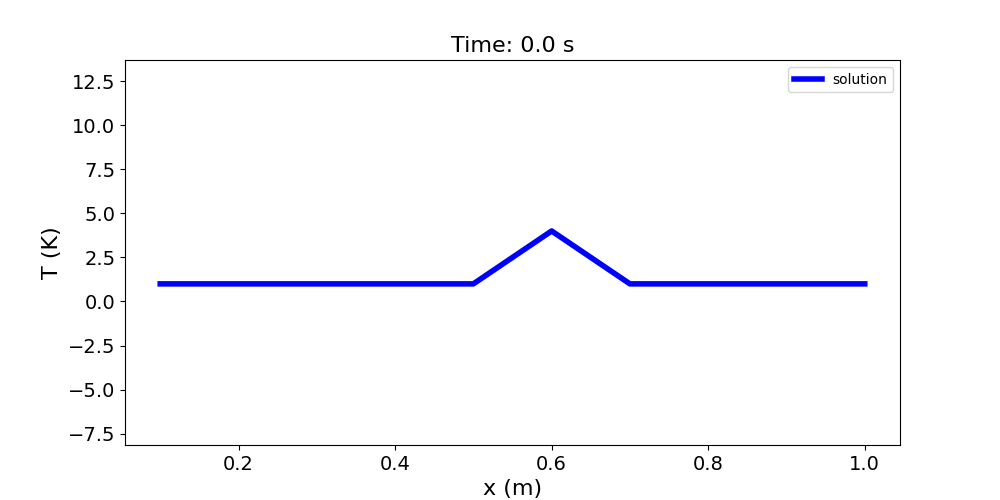

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
def plot_solution(iy):
    ax.clear()
    ax.plot(params['x'][1:], solution.y[:, iy], 'b-', linewidth=4, label='solution')
    ax.legend()
    ax.set_title(f'Time: {solution.t[iy]} s', fontsize=16)
    ax.set_xlabel('x (m)', fontsize=16)
    ax.set_ylabel('T (K)', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_ylim([np.min(solution.y), np.max(solution.y)])

widgets.interactive(plot_solution, iy = widgets.IntSlider(min=0, max=(len(solution.t)-1), value=0))